<a href="https://colab.research.google.com/github/blingkey/self-study_ML-DeepLearning/blob/main/BreamAndSmelt2_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A생선이 도미인지 아닌지 판별
혼공머신 02-1 훈련 세트와 테스트 세트(p66-86)

## 1. 훈련 세트와 테스트 세트

In [ ]:
# 도미와 빙어의 데이터를 합쳐 하나의 파이썬 리스트로 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 두 파이썬 리스트를 순회하며, 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트로 변경
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

하나의 생선 데이터는 '샘플(sample)'

도미와 빙어는 각각 35마리, 14마리로 전체 데이터는 49개의 샘플이 있음

사용하는 특성은 길이와 무게, 2개

데이터의 처음 35개를 train set으로, 나머지 14개를 test set으로 사용

In [ ]:
# 사이킷런의 KNeighborsClasssifier 클래스를 import하고 모델 객체를 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

전체 데이터에서 처음 35개 선택

리스트처럼 배열의 요소를 선택할 때는 배열의 위치, 즉 인덱스index를 지정

In [ ]:
# fish_data의 5번째 샘플을 출력하는 경우
print(fish_data[4])

[29.0, 430.0]


슬라이싱(slicing) :  콜론(:)을 가운데 두고 인덱스의 범위를 지정하여 여러 개의 원소를 선택

In [ ]:
# 1~5번째까지의 샘플 선택
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
# 마지막 원소까지 포함할 경우 2번째 인덱스 생략 가능
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# train set으로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# train set으로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# test set으로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# test set으로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [ ]:
# train set으로 fit() 메서드를 호출해 모델을 훈련
kn = kn.fit(train_input, train_target)
# test set으로 score() 메서드를 호출해 평가
kn.score(test_input, test_target)

0.0

정확도 0 ?!

⇒ train하는 데이터와 test set하는 데이터가 골고루 섞여 있지 않아 발생한 문제

## 2. 샘플링 편향(Sampling Bias)

샘플링 편향 : 일반적으로 train set와 test set에 샘플이 골고루 섞여 있지 않아 샘플링이 한쪽으로 치우친 경우

**-** 특정 종류의 샘플이 과도하게 많은 샘플링 편향을 가지고 있다면 제대로된 지도 학습 모델을 만들 수 없다.

## 넘파이(numpy)

파이썬의 대표적인 배열(array) 라이브러리

**-** 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구 제공

In [ ]:
# numpy 라이브버리 import
import numpy as np

In [ ]:
# 파이썬 리스트 → numpy 배열
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
# shape() : 배열의 크기 확인 ⇒ (샘플 수, 특성 수) 출력
print(input_arr.shape)

(49, 2)


준비한 numpy 배열에서 랜덤하게 샘플을 선택해 train set과 test set을 생성

배열을 섞은 뒤 나누는 방식 대신, 무작위로 샘플 선택하는 방법 사용

※ input_arr과 target_arr에서 같은 위치는 함께 선택되어야 한다.

```
    input_arr       target_arr

[[  25.4  242. ]       1           ···> 첫번째 샘플


 [  26.3  290. ]       1           ···> 두번째 샘플

 [  26.5  340. ]       1           ···> 세번째 샘플

       .               .

       .               .

       .               .

 [  15.0  19.9 ]]      0

```



이렇게 구해진 인덱스를 섞은 뒤에 input_arr와 target_arr에서 샘플을 선택하면 무작위로 train set을 나누는 셈이 된다.

In [ ]:
# arrange(N) : 0 ~ N-1까지 1씩 증가하는 인덱스 생성
np.random.seed(42)
index =  np.arange(49)
np.random.shuffle(index)

In [ ]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


섞인 인덱스를 사용해 전체 데이터를 train set과 test set으로 나눈다.

- **numpy에서 제공하는 배열 인덱싱(array indexing) 기능**

  : 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다.

In [ ]:
# input_arr에서 2번째, 4번째 샘플 선택하여 출력
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
# index 배열의 처음 35개를 input_arr과 target_arr에 전달하여 랜덤하게 35개의 샘플을 train set으로 생성
train_input =  input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
# 만들어진 index의 1번째 값은 13이므로, train_input의 1번째 원소는 input_arr의 14번째 원소가 들어 있음
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [ ]:
# 나머지 14개를 test set으로 생성
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

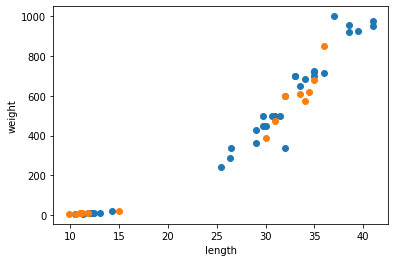

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

→ 파랑색: train set, 주황색 : test set

In [ ]:
# KNeighborsClassifier 클래스 객체 생성
kn = kn.fit(train_input, train_target)

In [ ]:
# train된 모델을 테스트
kn.score(test_input, test_target)

1.0

In [ ]:
# test set의 예측 결과와 실제 타킷을 확인
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

array()로 감싸 있는 값은 numpy 배열을 의미

즉, predict() 메서드가 반환하는 값은 파이썬 리스트(X) numpy 배열(O)

사이킷런 모델의 입력과 출력은 모두 numpy 배열